# Jupyter Tutorial 

Tutorial from [Data Quest](https://www.dataquest.io/blog/jupyter-notebook-tutorial/)

## Investigating our Data set

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid") # line magic to capture Matplotlib plots and render in cell output
df = pd.read_csv('fortune500.csv') # csv file downloaded from site

In [12]:
df.head() # looks at the first 5 rows

,Year,Rank,Company,Revenue (in millions),Profit (in millions)
0,1955,1,General Motors,9823.5,806
1,1955,2,Exxon Mobil,5661.4,584.8
2,1955,3,U.S. Steel,3250.4,195.4
3,1955,4,General Electric,2959.1,212.6
4,1955,5,Esmark,2510.8,19.1


In [11]:
df.tail() # looks at the last 5 rows

,Year,Rank,Company,Revenue (in millions),Profit (in millions)
25495,2005,496,Wm. Wrigley Jr.,3648.6,493
25496,2005,497,Peabody Energy,3631.6,175.4
25497,2005,498,Wendy's International,3630.4,57.8
25498,2005,499,Kindred Healthcare,3616.6,70.6
25499,2005,500,Cincinnati Financial,3614.0,584


In [13]:
df.columns = ['year', 'rank', 'company', 'revenue', 'profit'] # changes the columns name

In [14]:
df.head() # look at the changes!

,year,rank,company,revenue,profit
0,1955,1,General Motors,9823.5,806
1,1955,2,Exxon Mobil,5661.4,584.8
2,1955,3,U.S. Steel,3250.4,195.4
3,1955,4,General Electric,2959.1,212.6
4,1955,5,Esmark,2510.8,19.1


In [15]:
len(df) # outputs how many rows there are in csv, should be 25500

25500

In [16]:
df.dtypes

year         int64
rank         int64
company     object
revenue    float64
profit      object
dtype: object

The profit column has the data type ```object``` which should be ```float64``` like the revenue column. This means that the column probably contains some non-integer values. 

In [17]:
non_numberic_profits = df.profit.str.contains('[^0-9.-]')
df.loc[non_numberic_profits].head()

,year,rank,company,revenue,profit
228,1955,229,Norton,135.0,N.A.
290,1955,291,Schlitz Brewing,100.0,N.A.
294,1955,295,Pacific Vegetable Oil,97.9,N.A.
296,1955,297,Liebmann Breweries,96.0,N.A.
352,1955,353,Minneapolis-Moline,77.4,N.A.


In [18]:
set(df.profit[non_numberic_profits])

{'N.A.'}

In [19]:
len(df.profit[non_numberic_profits])

369

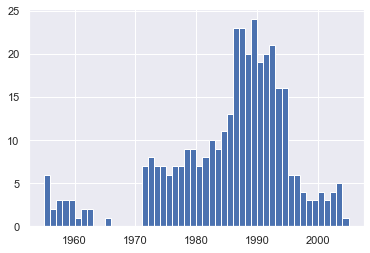

In [20]:
bin_sizes, _, _ = plt.hist(df.year[non_numberic_profits], bins = range(1955, 2006))

In [23]:
df = df.loc[~non_numberic_profits] 
df.profit = df.profit.apply(pd.to_numeric)
len(df)

25131

In [24]:
df.dtypes

year         int64
rank         int64
company     object
revenue    float64
profit     float64
dtype: object

## Plotting with matplotlib

Plotting the average profit by year.

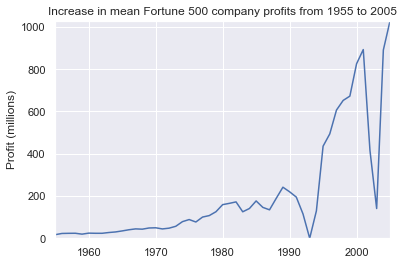

In [26]:
group_by_year = df.loc[:, ['year', 'revenue', 'profit']].groupby('year')
avgs = group_by_year.mean()
x = avgs.index
y1 = avgs.profit
def plot(x, y, ax, title, y_label):
    ax.set_title(title)
    ax.set_ylabel(y_label)
    ax.plot(x, y)
    ax.margins(x = 0, y = 0)
fig, ax = plt.subplots()
plot(x, y1, ax, 'Increase in mean Fortune 500 company profits from 1955 to 2005', 'Profit (millions)')

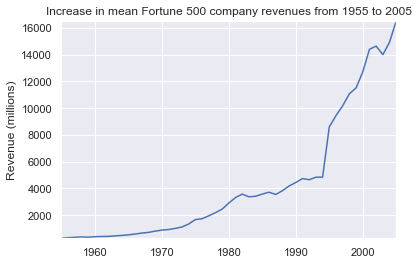

In [27]:
y2 = avgs.revenue
fig, ax = plt.subplots()
plot(x, y2, ax, 'Increase in mean Fortune 500 company revenues from 1955 to 2005', 'Revenue (millions)')

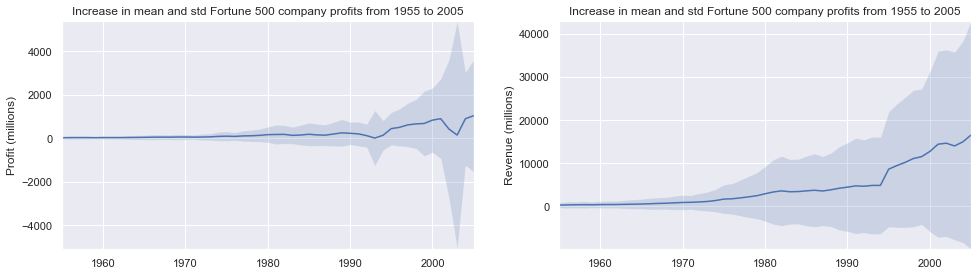

In [28]:
# superimpose the plots using their SD's
def plot_with_std(x, y, stds, ax, title, y_label):
    ax.fill_between(x, y - stds, y + stds, alpha = 0.2)
    plot(x, y, ax, title, y_label)
fig, (ax1, ax2) = plt.subplots(ncols = 2)
title = 'Increase in mean and std Fortune 500 company %s from 1955 to 2005'
stds1 = group_by_year.std().profit.values
stds2 = group_by_year.std().revenue.values
plot_with_std(x, y1.values, stds1, ax1, title % 'profits', 'Profit (millions)')
plot_with_std(x, y2.values, stds2, ax2, title % 'profits', 'Revenue (millions)')
fig.set_size_inches(14, 4)
fig.tight_layout()